In [147]:
import pandas as pd
import numpy as np
#Comienzo haciendo un filtro de las propiedades segun capital federal y Gran Buenos Aires
propiedades = pd.read_csv('/home/santiago/Desktop/Organizacion De Datos (75.06)/TP1/Hospitales/datos_procesados.csv', 
                          low_memory = False)

# 8 - Análisis de precios vs contaminación sonora


In [148]:
#Como solo tengo informacion de la contaminacion sonora en capital federal, me quedo con las propiedades de alli
propiedades_capital = propiedades[propiedades.place_with_parent_names.str.contains("Capital Federal")].copy()

In [149]:
propiedades_capital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166823 entries, 2 to 493835
Data columns (total 30 columns):
Unnamed: 0                    166823 non-null int64
country_name                  43803 non-null object
created_on                    166823 non-null object
currency                      166759 non-null object
description                   83119 non-null object
expenses                      19655 non-null object
extra                         39316 non-null object
floor                         45615 non-null float64
geonames_id                   159255 non-null float64
id                            43803 non-null object
image_thumbnail               162784 non-null object
lat                           154391 non-null float64
lat-lon                       154391 non-null object
lon                           154388 non-null float64
operation                     166823 non-null object
place_name                    166823 non-null object
place_with_parent_names       166823 non-nul

In [150]:
#Me interesa solo el precio por metro cuadrado en dolares, barrio(place_name)
propiedades_barrios = propiedades_capital[['place_name','price_usd_per_m2']]
#Se tienen los precios por metro cuadrado por barrio, pero capital federal no es un barrio, asi que lo remuevo
propiedades_barrios= propiedades_barrios[propiedades_barrios['place_name'] != 'Capital Federal']
propiedades_barrios.head(10)

,place_name,price_usd_per_m2
2,Palermo,2716.406250
3,Palermo,2602.204082
7,Las Cañitas,2500.000000
8,Flores,880.000000
9,Floresta,2076.000000
10,Parque Centenario,1083.333333
11,Liniers,1064.814815
13,Constitución,1725.000000
14,Constitución,1530.000000
15,Abasto,1723.076923


In [151]:
#No me interesan los datos con nulos
propiedades_barrios = propiedades_barrios.dropna()

In [152]:
#Antes de agrupar por barrio, primero le cambio el nombre al atributo, para el join posterior con los datos de contaminacion
propiedades_barrios['BARRIO'] = propiedades_barrios['place_name']
propiedades_barrios['Precio_m2(usd)'] = propiedades_barrios['price_usd_per_m2']
propiedades_barrios = propiedades_barrios[['BARRIO','Precio_m2(usd)']]
#Agrupo por barrios
promedio_por_barrios = propiedades_barrios.groupby('BARRIO').mean()
promedio_por_barrios = promedio_por_barrios.sort_values(by='Precio_m2(usd)',ascending=False)
promedio_por_barrios.head(10)

,Precio_m2(usd)
BARRIO,
Puerto Madero,5313.900277
Nuñez,3739.301610
Palermo Chico,3475.096645
San Cristobal,3349.443234
Las Cañitas,3311.376900
Boedo,3289.157468
Recoleta,3121.070097
Palermo Soho,3090.992981
Palermo,3033.773631


In [153]:
promedio_por_barrios.dropna()

,Precio_m2(usd)
BARRIO,
Puerto Madero,5313.900277
Nuñez,3739.301610
Palermo Chico,3475.096645
San Cristobal,3349.443234
Las Cañitas,3311.376900
Boedo,3289.157468
Recoleta,3121.070097
Palermo Soho,3090.992981
Palermo,3033.773631


In [154]:
#Ahora comienzo a analizar lo que tengo de contaminacion sonora en 2013
contaminacion_sonora = pd.read_csv('contaminacion acustica 2013.csv', sep = ";",low_memory = False) 
contaminacion_sonora.info()
#TMI es el numero de la torre de monitoreo, PROMEDIO_ENERGETICO_HORA representa los decibeles medidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91584 entries, 0 to 91583
Data columns (total 3 columns):
TMI                         91584 non-null int64
PROMEDIO_ENERGETICO_HORA    85860 non-null float64
FECHA                       91584 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [155]:
#Cambio el nombre de la columna para que sea mas intuitivo
contaminacion_sonora['dB'] = contaminacion_sonora['PROMEDIO_ENERGETICO_HORA']
contaminacion_sonora = contaminacion_sonora[['TMI','FECHA','dB']]
contaminacion_sonora[:5]#En total hay 91584 registros

,TMI,FECHA,dB
0,1282,01/01/2013 0:00,68.0
1,1282,01/01/2013 1:00,65.0
2,1282,01/01/2013 2:00,66.0
3,1282,01/01/2013 3:00,63.0
4,1282,01/01/2013 4:00,64.0


In [156]:
#Ahora veo que informacion me aportan las torres de monitoreo
df_torres = pd.read_csv('torres-de-monitoreo-inteligente.csv', low_memory = False)
df_torres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
TMI          16 non-null int64
BARRIO       16 non-null object
DIRECCION    16 non-null object
dtypes: int64(1), object(2)
memory usage: 464.0+ bytes


In [157]:
df_torres#Hay datos de 16 torres en total(Una por barrio, osea que tengo datos de 16 barrios en capital federal)

,TMI,BARRIO,DIRECCION
0,1282,Mataderos,Av. Eva Perón 5251
1,1283,Liniers,Lisandro de la Torre 39
2,1284,Vélez Sarsfield,Av. Segurola 726
3,1286,Nueva Pompeya,Quilmes 436
4,1289,Belgrano,Av. Juramento 2427
5,1291,Parque Patricios,Av. Caseros 2526
6,1292,Parque Avellaneda,Remedios 3761
7,1296,Villa Devoto,Av. Francisco Beiró 3994
8,1295,Villa Urquiza,Congreso 4364
9,1305,Almagro,Av. Rivadavia 3883


In [158]:
#Hago un merge de la informacion de las torres y los decibeles medidos por barrio
contaminacion_sonora_barrios = pd.merge(contaminacion_sonora, df_torres, on='TMI', how = 'inner')
contaminacion_sonora_barrios = contaminacion_sonora_barrios[['TMI','FECHA','dB','BARRIO']]
contaminacion_sonora_barrios.head()
#81408 registros en total

,TMI,FECHA,dB,BARRIO
0,1282,01/01/2013 0:00,68.0,Mataderos
1,1282,01/01/2013 1:00,65.0,Mataderos
2,1282,01/01/2013 2:00,66.0,Mataderos
3,1282,01/01/2013 3:00,63.0,Mataderos
4,1282,01/01/2013 4:00,64.0,Mataderos


### Podemos echar un vistazo a la evolucion de los decibeles (en promedio) segun el horario
Probamos con 2 o 3 barrios para ver como se comporta la relacion en un dia cualquiera

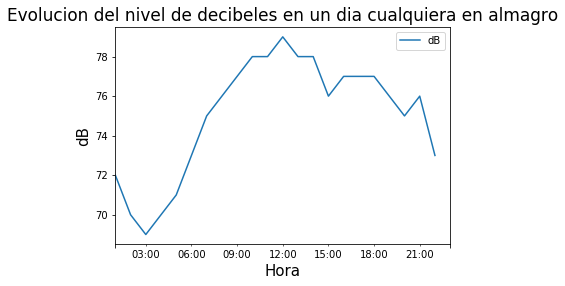

In [167]:
#Convierto la fecha a un formato mas practico
contaminacion_sonora_barrios['FECHA'] = pd.to_datetime(contaminacion_sonora_barrios['FECHA'], format='%d/%m/%Y %H:%M')
contaminacion_almagro = contaminacion_sonora_barrios[contaminacion_sonora_barrios['BARRIO'] == 'Almagro']
contaminacion_almagro = contaminacion_almagro[['FECHA','dB']]  
#Me quedo con un dia cualquiera, por ejemplo, el 31 de Julio
contaminacion_almagro = contaminacion_almagro[(contaminacion_almagro['FECHA'] > '31-07-2013 00:00') &
                                              (contaminacion_almagro['FECHA'] < '31-07-2013 23:59')]
contaminacion_almagro.drop_duplicates(inplace=True)
contaminacion_almagro = contaminacion_almagro.groupby('FECHA', as_index=False).mean()
plot = contaminacion_almagro.plot(x='FECHA', y="dB")
plot.set_title('Evolucion del nivel de decibeles en un dia cualquiera en almagro', fontsize = 17)
plot.set_xlabel("Hora", fontsize = 15)
plot.set_ylabel("dB", fontsize = 15)

### Para Nueva Pompeya

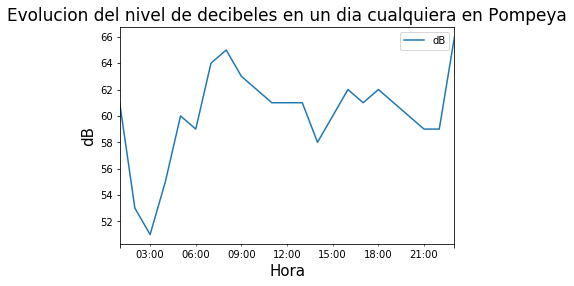

In [171]:
contaminacion_pompeya = contaminacion_sonora_barrios[contaminacion_sonora_barrios['BARRIO'] == 'Nueva Pompeya']
contaminacion_pompeya = contaminacion_pompeya[['FECHA','dB']]  
#Me quedo con un dia cualquiera, por ejemplo, el 31 de Julio
contaminacion_pompeya = contaminacion_pompeya[(contaminacion_pompeya['FECHA'] > '01-01-2013 00:00') &
                                              (contaminacion_pompeya['FECHA'] < '01-01-2013 23:59')]
contaminacion_pompeya.drop_duplicates(inplace=True)
contaminacion_pompeya = contaminacion_pompeya.groupby('FECHA', as_index=False).mean()
plot = contaminacion_pompeya.plot(x='FECHA', y="dB")
plot.set_title('Evolucion del nivel de decibeles en un dia cualquiera en Pompeya', fontsize = 17)
plot.set_xlabel("Hora", fontsize = 15)
plot.set_ylabel("dB", fontsize = 15)

In [161]:
#Agrupo por barrios
contaminacion_promedio =  contaminacion_sonora_barrios.groupby('BARRIO').mean()
contaminacion_promedio =  contaminacion_promedio.sort_values(by='dB', ascending=False)
dB_promedio = contaminacion_promedio['dB']

#### Podria ser util ver que barrios tienen (en promedio) mayor contaminacion sonora

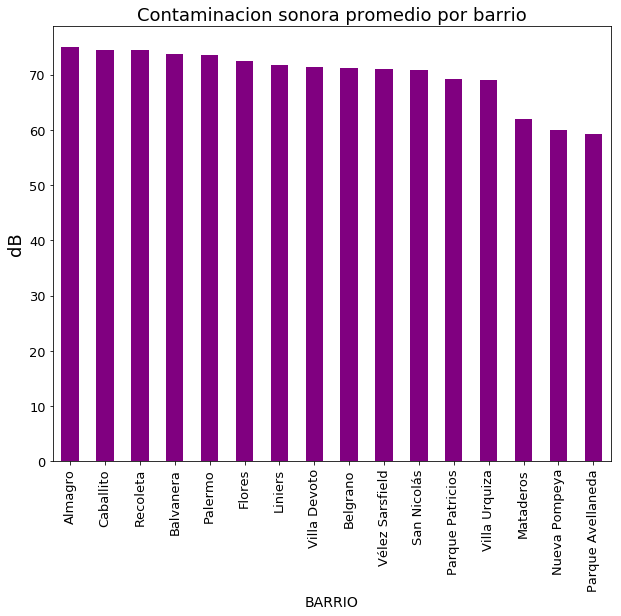

In [162]:
%matplotlib inline
plot= dB_promedio.plot(kind = 'bar', title = 'Contaminacion promedio barrio', figsize=(10,8), color='purple' ,fontsize=13)
plot.set_title('Contaminacion sonora promedio por barrio', fontsize=18);
plot.set_xlabel('BARRIO', fontsize=14);
plot.set_ylabel('dB', fontsize=18);

In [163]:
dB_promedio_index = dB_promedio.reset_index()
promedio_por_barrios_index = promedio_por_barrios.reset_index()
#Ahora hago un merge de los datos de contaminacion y precio por barri
precios_y_contaminacion = pd.merge(dB_promedio_index,propiedades_barrios,on='BARRIO', how = 'inner')
precios_y_contaminacion =  precios_y_contaminacion[['BARRIO','dB','Precio_m2(usd)']]
precios_y_contaminacion.head(10)

,BARRIO,dB,Precio_m2(usd)
0,Almagro,74.956522,1723.076923
1,Almagro,74.956522,1590.789474
2,Almagro,74.956522,1934.210526
3,Almagro,74.956522,1250.000000
4,Almagro,74.956522,793.650794
5,Almagro,74.956522,1169.354839
6,Almagro,74.956522,1945.945946
7,Almagro,74.956522,1428.571429
8,Almagro,74.956522,1187.500000
9,Almagro,74.956522,837.209302


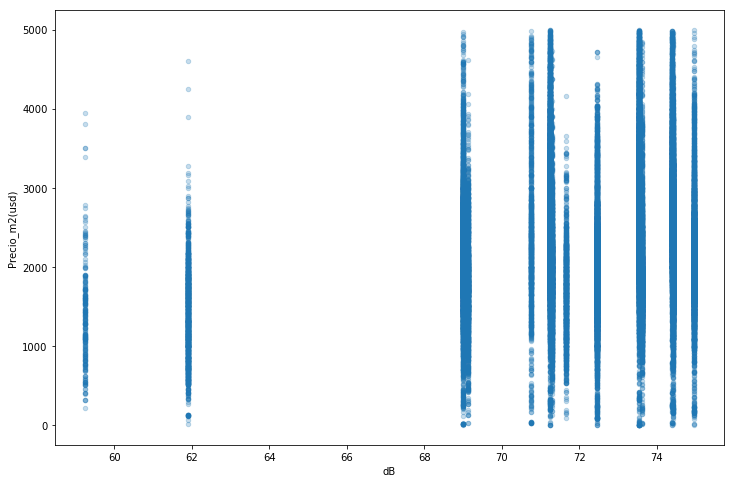

In [181]:
#Hago un scatter plot para ver si hay alguna tendencia que sugiera que hay relacion entre las magnitudes
precios_y_contaminacion = precios_y_contaminacion[precios_y_contaminacion['Precio_m2(usd)']<5000]
precios_y_contaminacion.plot.scatter('dB','Precio_m2(usd)',alpha=0.25,figsize=(12,8));
plot.set_title('Relacion contaminacion sonora promedio y precio por metro cuadrado', fontsize=18);
plot.set_xlabel('Precio del metro cuadrado', fontsize=16);
plot.set_ylabel('dB(Promedio)', fontsize=18);

Viendo la grafica, no hay una relacion en lo absoluto que indique que properati tiene en cuenta 
este factor a la hora de darle un valor a la propiedad